# DSFB Assignment 3 - Solutions Try to modify

In this assignment, you will begine to work with data to build some basic models. 

## IMPORTS

Here are a bunch of libraries that you may need to use...

In [92]:
# Standard imports :)
import numpy  as np
import pandas as pd

import itertools
import random
import math  

# Plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as patches
%matplotlib inline  
import seaborn as sns
sns.set(style="white")

# ignore some warnings 
import warnings
warnings.filterwarnings('ignore')

# Set a seed for replication
SEED = 1  # Use this anywhere a stochastic function allows you to set a seed

# PART 1: LOGIT MODEL (without sklearn)

Suppose we collect data for a group of students in a course with the following variables:  

    X1 = hours studied  
    X2 = undergrad GPA  
    Y = receive a grade of 4.0  

In [93]:
# Suppose we fit a logit model to the data above and obtain the following coefficients:
b0 = -5
b1 = 0.1
b2 = 1

**PROBLEM**: Estimate the probability that a student who studies for 40 hours, and who has an undergrad GPA of 3.0, will get a 4.0 in the class.

In [94]:
# Estimate the probability and print it out
x1 = 40
x2 = 3.0
p = math.exp(b0 + b1*x1 + b2*x2)/(1+ math.exp(b0 + b1*x1 + b2*x2))
print('The predicted probability for this case is:', p)

The predicted probability for this case is: 0.8807970779778824


**PROBLEM**: How many hours would a student who has an undergrad GPA of 3.0 need to study to have an 80% chance of getting a grade of 4.0 in the class? Tip: You can do all of this on paper with math. But then type it into the markdown field below to show your work. Perform the very final (reduced) calculation in python to show the answer.

Show your work here to estimate the number of hours for X1:

    ln(p/(1-p) = b0 + b1*x1 + b2*x2
    ln(0.8/0.2) = -5 + 0.1 * x1 + 3
    ln(4) = 0.1 * x1 - 2
    x1 = (ln(4) +2) * 10
    x1 = 33.86


In [95]:
# Use python to manually calculate that value:
x1 = (math.log(4) +2) * 10
print('The solution for X1 in this problem is:', x1)

The solution for X1 in this problem is: 33.86294361119891


**PROBLEM**: Use your solution from above (along with the estimated logit model coefficients given to you earlier) to show that the logit model would in fact predict a probability of 80%.

Show the calculation (written out, step-by-step) here:  

    prob = exp(b0 + b1*x1 + b2*x2) / (1 + exp(b0 + b1*x1 + b2*x2))  
    0.80 = exp(b0 + b1*x1 + b2*x2) / (1 + exp(b0 + b1*x1 + b2*x2))  
    0.80 = exp(-5 + 0.1*x1 + 3) / (1 + exp(-5 + 0.1*x1 + 3))
    0.80 = exp(0.1*x1 - 2) / (1 + exp(0.1*x1 - 2))
    0.80 = exp(0.1*33.86 -2) / (1 + exp(0.1*33.86 -2))

In [96]:
# Use Python to perform the calculation and show the result:
b0 = -5
b1 = 0.1
b2 = 1
x1 = ( math.log(4) + 2 ) * 10
x2 = 3.0

predicted_probability = math.exp( b0 + b1*x1 + b2*x2 ) / (1 + math.exp( b0 + b1*x1 + b2*x2 ))
print('The predicted Probability from the solution is:', "{0:.2f}".format(predicted_probability))

The predicted Probability from the solution is: 0.80


# PART 2: PLOT ROC CURVES (without sklearn)

Suppose you have the following labeled data: for each observation you are given a Positiveor Negative label and the predicted probability. The "Positive" case is labeled as 1, and the "Negative" case is labeled with 0. For example, an observation of (0, 0.45) means the truth value is Negative and the predicted probability of being positive is 0.45.

In [97]:
data = [
    (1, 0.9),
    (0, 0.8),
    (1, 0.6),
    (1, 0.4),
    (0, 0.2)
]

**PROBLEM**: Calculate the True Positive Rate and the False Positive Rate at each observation. You may NOT use `sklearn` or any other supporting library for this problem - you must do everything in "pure Python". 

In [98]:
# Calculate TPR and FPR
labels, probs   = zip(*data) 
total_positives = sum(labels)
total_negatives = len(labels)-sum(labels)
num_positives   = 0
num_pos_errors  = 0
tpr = [0, ]
fpr = [0, ]

for i in range(len(labels)):
    if labels[i]:
        num_positives += 1
        tpr.append(num_positives/total_positives)
        fpr.append(fpr[-1])
    else:
        num_pos_errors += 1
        tpr.append(tpr[-1])
        fpr.append(num_pos_errors/total_negatives)

**PROBLEM**: Plot an ROC curve. You may NOT use `sklearn` or any other supporting library for this problem - you must do everything in "pure Python". 

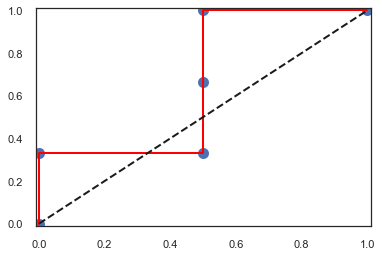

In [99]:
# Plot the ROC Curve
fig, ax = plt.subplots()
ax.plot(fpr, tpr, lw=2, c='red')
ax.scatter(fpr, tpr, lw=5)
ax.plot([0, 1], [0, 1], 'k--', lw=2)
ax.set_xlim([-.01,1.01])
ax.set_ylim([-.01,1.01])
plt.show()

# PART 3: AGGLOMERATIVE CLUSTERING (without sklearn)

Suppose you have the following observations in a two-dimensional Euclidean space. Here we give you a dictionary with a label for the point, and the point in (x,y) coordinates. 

In [100]:
# Raw observations
data   = [(1,1), (2,1), (5,1), (7,1), (1,5), (3,4), (4,5) ]
labels = [ 'A',   'B',   'C',   'D',   'E',   'F',   'G']

# Clusters of 1 observation, at lowest level
a = [data[0], ]
b = [data[1], ]
c = [data[2], ]
d = [data[3], ]
e = [data[4], ]
f = [data[5], ]
g = [data[6], ]

You may use the following function to plot the data...

In [101]:
def plot_data(data, labels, xlim, ylim):
    """ Function to plot a list of (x,y) coordinates, with optional lables. 
        
        Args:  
              data     A list of (x,y) point to plot
              labels   A list of text labels, in same order as data.
    """
    
    fig, ax = plt.subplots()
    for point, label in zip(data, labels):
        ax.scatter(point[0], point[1], c='black')
        if labels: ax.annotate(label, point, textcoords="offset points", xytext=(1,10))
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(True)
    return fig, ax

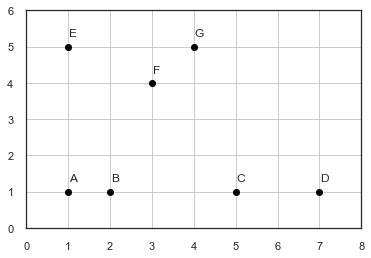

In [102]:
plot_data(data, labels, xlim=(0,8), ylim=(0,6))
pass

**PROBLEM**: Write a custom function in pure Python to calculate the Euclidean straight-line distance between any two points with (x,y) coordinates.

In [103]:
def distance(point_a, point_b):
    """ Function to calculate and return the Euclidean straight distance between any two points with (x,y) coordinates.
        
        Args:  
               point_a   (x,y) of point a
               point_b   (x,y) of point b
    """
    return math.sqrt((point_a[0]-point_b[0])**2 + (point_a[1]-point_b[1])**2)

**PROBLEM**: Write a custom function in pure Python to calculate a Euclidean distance matrix between a list of points; return a quasi-matrix as a pure Python "list of lists."

In [104]:
def distance_matrix(points):
    """ Function to calculate the point to point distances between a list of points.
        Return values in a quasi-"matrix" in the pure python form of a list-of-lists.
        
        Args:      
              points      A list of coordinates. For example: [(1,3), (4,9), (5,7)]
    """
    size = len(points)
    M = [ [ [] for i in range(size)] for i in range(size)]
    for i in range(size):
        for j in range(size):
            M[i][j] = distance(points[i], points[j])
    return M

**PROBLEM**: Write a custom function in pure Python to calculate the centroid of a cluster of coordinates.

In [105]:
def centroid(points):
    """ Function to calculate and return the (x,y) coordinates for the centroid of a list of such (x,y) coordinates.
        Args:  
              points      A list of coordinates for the cluster. For example: [(1,3), (4,9), (5,7)]
    """
    x, y = zip(*points)
    avg_x = sum(x)/len(x)
    avg_y = sum(y)/len(x)
    return (avg_x, avg_y)

**PROBLEM**: Write a custom function in pure Python to calculate the Euclidean distance between the closest points between two different clusters.

In [106]:
def separation(cluster_a, cluster_b):
    """ Function to calculate and return the Euclidean distance between the closest points between two different clusters.
        
        Args:  
              points      A list of coordinates for the cluster. For example: [(1,3), (4,9), (5,7)]
    """
    sep = None
    for point_a in cluster_a:
        for point_b in cluster_b:
            dist = distance(point_a, point_b)
            if sep is None:
                sep = dist
            elif dist < sep:
                sep = dist
    return sep

**PROBLEM**: Write a custom function in pure Python to calculate the distortion of a cluster. Define "distortion" as the sum of the squared distances of each point to the centroid of the cluster.

In [107]:
def distortion(points):
    """ Function to calculate and return the distortion of a cluster. 
        Distortion is defined as the sum of the squared distances of each point to the centroid of the cluster.
        
        Args:  
              points      A list of coordinates for the cluster. For example: [(1,3), (4,9), (5,7)]
    """
    return sum([distance((x,y), centroid(points))**2 for (x, y) in points])

**PROBLEM**:  Use the custom distance_matrix() function coded above to calculate the distance matrix between all observations. Try to print this out in a readable format (optional).

In [108]:
# Calc and print distance matrix between all observations
for row in distance_matrix(data):
    line = ''
    for value in row:
        line += "{0:.2f}".format(value) + '  '
    print(line)

0.00  1.00  4.00  6.00  4.00  3.61  5.00  
1.00  0.00  3.00  5.00  4.12  3.16  4.47  
4.00  3.00  0.00  2.00  5.66  3.61  4.12  
6.00  5.00  2.00  0.00  7.21  5.00  5.00  
4.00  4.12  5.66  7.21  0.00  2.24  3.00  
3.61  3.16  3.61  5.00  2.24  0.00  1.41  
5.00  4.47  4.12  5.00  3.00  1.41  0.00  


**PROBLEM**: We started with seven "clusters" with one observation in each cluster. Now use hierarchical agglomerative clustering to fuse the data together (going from the bottom up). Use the distance matrix above to help you perform this step. You may do it manually (by inspecting the matrix) or you may do it programmatically. Once you decide the proper order of fusing clusters, make variable assignments by updating the code below.

In [109]:
# Define the next 6 clusters by defining a variable that holds a list of all the points in that cluster
ab      =  a    +  b
fg      =  f    +  g
cd      =  c    +  d
efg     =  e    +  fg
abcd    =  ab   +  cd
abcdefg =  abcd +  efg

**PROBLEM**: Summarize the clustering process by printing out values for the items in the cluser, the separation distance between the old relevant clusters before fusing, the internal distortion within the new cluster after fusing, and the members of the new cluster after fusing.

In [110]:
# Print out the following values for each of the clusters with 2 or more observations in them
print('CLUSTER'.center(10), 'DISTANCE'.center(10), 'DISTORTION'.center(20), 'MEMBERS')

print('AB'.center(10),      "{0:.2f}".format(separation(a,b)).center(10),      "{0:.2f}".format(distortion(ab)).center(20),      ab)
print('FG'.center(10),      "{0:.2f}".format(separation(f,g)).center(10),      "{0:.2f}".format(distortion(fg)).center(20),      fg)
print('CD'.center(10),      "{0:.2f}".format(separation(c,d)).center(10),      "{0:.2f}".format(distortion(cd)).center(20),      cd)
print('FGE'.center(10),     "{0:.2f}".format(separation(e,fg)).center(10),     "{0:.2f}".format(distortion(efg)).center(20),     efg)
print('ABCD'.center(10),    "{0:.2f}".format(separation(ab,cd)).center(10),    "{0:.2f}".format(distortion(abcd)).center(20),    abcd)
print('ABCDEFG'.center(10), "{0:.2f}".format(separation(abcd,efg)).center(10), "{0:.2f}".format(distortion(abcdefg)).center(20), abcdefg)

 CLUSTER    DISTANCE       DISTORTION      MEMBERS
    AB        1.00            0.50         [(1, 1), (2, 1)]
    FG        1.41            1.00         [(3, 4), (4, 5)]
    CD        2.00            2.00         [(5, 1), (7, 1)]
   FGE        2.24            5.33         [(1, 5), (3, 4), (4, 5)]
   ABCD       3.00           22.75         [(1, 1), (2, 1), (5, 1), (7, 1)]
 ABCDEFG      3.16           53.14         [(1, 1), (2, 1), (5, 1), (7, 1), (1, 5), (3, 4), (4, 5)]


**PROBLEM**: Plot the data again, but this time also plot a rectangle around each cluster, fusing clusters upward until everything is in just one cluster. TIP: You can use the plot_data() function from before, and the plot_cluster() function below, to help you with the plotting.

In [111]:
# You can use this function to add an illustrative box around a given cluster of points in a plot
def plot_cluster(ax, cluster):
    """ Function to add an illustrative box around a given cluster of points in a plot.
    
        Args:  
              ax        An axis object from calling plt.subplots() in matplotlib
              cluster   A list of coordinates for the cluster. For example: [(1,3), (4,9), (5,7)]
    """
    padding = len(cluster)**2 * 0.05
    min_x   = min([x for (x,y) in cluster]) - 0.5 - padding
    max_x   = max([x for (x,y) in cluster]) - 0.5 + padding
    min_y   = min([y for (x,y) in cluster]) - 0.5 - padding
    max_y   = max([y for (x,y) in cluster]) - 0.5 + padding
    width   = max_x - min_x + 1  
    height  = max_y - min_y + 1.25  
    ax.add_patch(patches.Rectangle((min_x,min_y), width, height, linewidth=2, edgecolor='r',facecolor='none'))

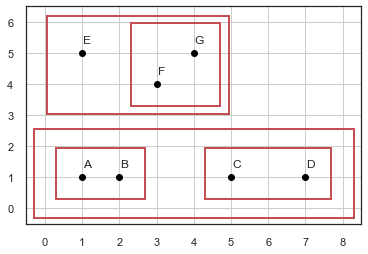

In [112]:
# Plot the Data and plot a box around each hierarchical cluster
fig, ax = plot_data(data, labels, xlim=(-0.5,8.5), ylim=(-0.5,6.5))
for cluster in [ab, fg, cd, efg, abcd, abcdefg]:
    plot_cluster(ax, cluster)

**PROBLEM**: Using the data you have calculated above, now plot a dendogram below. You may do this manually usinge the `images/A3-Fig-2.png` file and editing it in an image editing program (save your edits to that file, and commit changes to your repository). Or try to use special functions in matplot lib to plot it directly.

<img src="images/A3-Dendogram.png" width="800" height="800" align="center"/>

**PROBLEM**: Using your dendogram, report which observations would be grouped together if you had three clusters.

Cluster 1: ____________ 

Cluster 2: ____________ 

Cluster 3: ____________

**PROBLEM**: Using your dendogram, report which observations would be grouped together if you had five clusters.

Cluster 1: ____________ 

Cluster 2: ____________ 

Cluster 3: ____________

Cluster 4: ____________

Cluster 5: ____________

# **PART 4**: NOW WE RETURN TO CREDIT DEFAULT PREDICTIONS AS IN ASSIGNMENT 2
Repeat the analysis using a logit model. You can start with the code below, as it shows you how to setup, fit, and predict with a logit model in sklearn.

We now return to the problem of trying to predict the probability of defaulting on a credit card account at a Taiwanese bank. A credit card default happens when a customer fails to pay the minimum due on a credit card bill for more than 6 months. 

We will use a dataset from a Taiwanese bank with 30,000 observations (Source: *Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.*). Each observation represents an account at the bank at the end of October 2005.  We renamed the variable default_payment_next_month to customer_default. The target variable to predict is `customer_default` -- i.e., whether the customer will default in the following month (1 = Yes or 0 = No). The dataset also includes 23 other explanatory features. 

Variables are defined as follows:

| Feature name     | Variable Type | Description 
|------------------|---------------|--------------------------------------------------------
| customer_default | Binary        | 1 = default in following month; 0 = no default 
| LIMIT_BAL        | Continuous    | Credit limit   
| SEX              | Categorical   | 1 = male; 2 = female
| EDUCATION        | Categorical   | 1 = graduate school; 2 = university; 3 = high school; 4 = others
| MARRIAGE         | Categorical   | 0 = unknown; 1 = married; 2 = single; 3 = others
| AGE              | Continuous    | Age in years  
| PAY1             | Categorical   | Repayment status in September, 2005 
| PAY2             | Categorical   | Repayment status in August, 2005 
| PAY3             | Categorical   | Repayment status in July, 2005 
| PAY4             | Categorical   | Repayment status in June, 2005 
| PAY5             | Categorical   | Repayment status in May, 2005 
| PAY6             | Categorical   | Repayment status in April, 2005 
| BILL_AMT1        | Continuous    | Balance in September, 2005  
| BILL_AMT2        | Continuous    | Balance in August, 2005  
| BILL_AMT3        | Continuous    | Balance in July, 2005  
| BILL_AMT4        | Continuous    | Balance in June, 2005 
| BILL_AMT5        | Continuous    | Balance in May, 2005  
| BILL_AMT6        | Continuous    | Balance in April, 2005  
| PAY_AMT1         | Continuous    | Amount paid in September, 2005
| PAY_AMT2         | Continuous    | Amount paid in August, 2005
| PAY_AMT3         | Continuous    | Amount paid in July, 2005
| PAY_AMT4         | Continuous    | Amount paid in June, 2005
| PAY_AMT5         | Continuous    | Amount paid in May, 2005
| PAY_AMT6         | Continuous    | Amount paid in April, 2005

The measurement scale for repayment status is:   

    -2 = payment two months in advance   
    -1 = payment one month in advance   
    0 = pay duly   
    1 = payment delay for one month   
    2 = payment delay for two months   
    3 = payment delay for three months   
    4 = payment delay for four months   
    5 = payment delay for five months   
    6 = payment delay for six months   
    7 = payment delay for seven months   
    8 = payment delay for eight months   
    9 = payment delay for nine months or more  

### **Setup AGAIN**  

We purposefully have two different setup sections for this assignment. In the sections above you could not use sklearn, so we did not want to import those libraries. Now you CAN use sklearn.

**From now on in this assignment, you CAN use sklearn !**

### Imports

In [113]:
# Standard imports
import numpy  as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

import itertools
import pandas_profiling

# Plotting
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline  
import seaborn as sns
sns.set(style="white")

# scikit-learn
from sklearn.dummy           import DummyClassifier
from sklearn.linear_model    import LogisticRegression
from sklearn.svm             import SVC
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.ensemble        import RandomForestClassifier
from sklearn.ensemble        import GradientBoostingClassifier

# Supporting functions from scikit-learn
from sklearn.metrics         import confusion_matrix
from sklearn.metrics         import roc_curve
from sklearn.metrics         import roc_auc_score
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree            import export_graphviz
from sklearn.decomposition   import PCA

# ignore some warnings 
import warnings
warnings.filterwarnings('ignore')

### Constants

In [114]:
# Set a seed for replication
SEED = 1

### Custom Functions

We will also define a few "helper functions" to automate repetitive tasks that we will perform below.

In [115]:
def plot_confusion_matrix(cm, classes=[0,1], normalize=False, title='Confusion Matrix', cmap=plt.cm.Reds):
    """ 
    Function to plot a sklearn confusion matrix, showing number of cases per prediction condition 
    
    Args:
        cm         an sklearn confusion matrix
        classes    levels of the class being predicted; default to binary outcome
        normalize  apply normalization by setting `normalize=True`
        title      title for the plot
        cmap       color map
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, round (cm[i, j],2), horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [116]:
def plot_roc(fpr, tpr, title='ROC Curve', note=''):
    """
    Function to plot an ROC curve in a consistent way.
    
    Args:
        fpr        False Positive Rate (list of multiple points)
        tpr        True Positive Rate (list of multiple points)
        title      Title above the plot
        note       Note to display in the bottom-right of the plot
    """
    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    if note: plt.text(0.6, 0.2, note)
    plt.show()

In [117]:
def print_feature_importance(tree_model, feature_names):
    """
    Function to print a list of features from an sklearn tree model (ranked by importance of the feature)
    
    Args:
        tree_model       A sklearn DecisionTreeClassifier()
        feature_names    A list of features used by the DecisionTreeClassifier
    """
    print('Feature'.center(12), '   ',  'Importance')
    print('=' * 30)
    for index in reversed(np.argsort(tree_model.feature_importances_)):
        print(str(feature_names[index]).center(12) , '   ', '{0:.4f}'.format(tree_model.feature_importances_[index]).center(8)) 

### **Load and Preprocess Data**

In [118]:
# Load Data
data = pd.read_csv('data/credit_data.csv')

# One-hot-encode SEX and MARRIAGE  
data = pd.get_dummies(data = data, columns = ['SEX', 'MARRIAGE'])

# Drop the ID column
data = data.drop(columns = ['ID'], axis = 1)

# Sort Columns alphabetically
data = data.reindex(sorted(data.columns), axis=1)

# Move target variable to first column (not necessary, but easier to see)
data = data.set_index('customer_default').reset_index() 

# Select target
y = np.array(data['customer_default'])

# Select features 
features = list(set(list(data.columns)) - set(['customer_default']))
X = data.loc[:, features]

## A Discussion of Models and Results from Assignment 2...

What might we do to improve our prediction models from Assignment 2?

**Accuracy?**

**PROBLEM**: Note that the logit model in Assignment 2 did WORSE than the baseline model in Assignment 2 (at least when predicting class labels with a default probability threshold and when evaluated by the total number of errors made by the model). Using accuracy to compare models, however, as two drawbacks for the credit default problem. Describe those problems and potential solutions.

ANSWER: The two main problems with using accuracy for this dataset are:  

  1. The distribution of the target outcome variable is not balanced. Therefore, a model that uniformly predicts that NO customer will default can still get a high accuracy.

  2. Different probability thresholds for making a "positive" prediction can lead to different performance results in the model. Thus, it may be more sensible to configure the model to predict and use probabilities, instead of directly predicting a label.  
  
A more useful metric for classification is the "**Area under the ROC curve**" (also called the **AUC**). The AUC gives you the probability that a randomly selected customer that is labeled as defaulting will be assigned a higher probability of default than a randomly selected customer that is labeled as NOT defaulting. The AUC also does not suffer from class skewness, and therefore is able to adjust for probabilities directly (instead of the distribution of class labels). But in Assignment 2, how did the AUC scores actually compare...?  

**PROBLEM**: When do we need to standardize data?

ANSWER: It is not necessary to normalize or standardize data for linear models when there is no regularization or special optimization procedure involved. Estimated coefficients will adjust to non-normalized data and the accuracy of the prediction will not be affected. That however will change for some of the upcoming models.

**PROBLEM**: When do we need to use a _Pipeline_? (And what is an sklearn Pipeline, anyway?) TIP: You will need to do some self-directed learning about pipelines in sklearn...

ANSWER: Regularized models and other, more-complex models often require **standardized data** to work properly. However, you cannot standardize all of the data up-front in the beginning; if you do, then information will "leak" from the training data into the testing data because the standardization will reflect both datasets. You therefore need a special way to process data and models so that processing steps can be defined up-front, but run later on only the relevant sub-section of data. You accomplish that by using a late-execution "**pipeline**."

**PROBLEM**: Was our training/testing method in Assignment 2 robust? What would make it more robust?

ANSWER: One concern with the previous training/testing approach is that the relative performance of the baseline model and the Logit model might depend on the particular training/testing split in the data that was performed. In a more advanced analysis, we might use k-fold cross-validation for a more reliable testing estimate. Another concern with the previous training/testing approach arises when we need to "tune" a model with a hyper-parameter for better performance. In that case, hyper-parameter tuning would pick up information from the testing data and overfit the model. In the models that follow, we will need to tune hyper-parameters, so we will now need to change our testing strategy and generate three data splits: **training** (60%), **validation** (20%) and **test** (20%). We can do this by first splitting a training/testing set 80/20, and then further split the training set into a smaller training set and a validation set. The terminology for these sets can be confusing (and different resources use different names for the sets), but in this example we will create a "Validation Set" that pulls from what was originally part of the training set. Most importantly, one should set aside a testing set that is *never used* until the very final test.

**PROBLEM**: For all of the problems that follow, divide the data into three parts:  **training** (60%), **validation** (20%) and **test** (20%). In the python code, refer to those subsets as: 

| Subset      |  Pct.  |  X code var     | Target code var |
|-------------|--------|-----------------|-----------------|
| training    |  60%   |  X_train_train  | y_train_train
| validation  |  20%   | X_train_val     | y_train_val
| testing     |  20%   | X_test          | y_test


In [119]:
# Use the sklearn train_test_split() function to split data into "train", "validation", and "test" 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=SEED)


# **PART 5**: Logit Model with L1 Regularization ("Lasso")
Predict credit default using a logit model. We give you a start with the code below, as it shows you how to setup, fit, and predict with a pipeline in sklearn.

In [120]:
# Build pipeline   
estimators = []
estimators.append(('standardize', StandardScaler()))         # tell it to standardize features
estimators.append(('logit_model_l1', LogisticRegression()))  # tell it to use a logit model
pipeline = Pipeline(estimators) 
pipeline.set_params(logit_model_l1__penalty='l1')            # tell it to regularize with L1 norm

Pipeline(memory=None,
     steps=[('standardize', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logit_model_l1', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

Tune for the optimal amount of regularization (the tuning parameter `c` in sklearn). We will again give you this code to show you the general pattern for how to setup hyper-parameter tuning in sklearn.

In [121]:
# Tune C  
results = []
for c in np.logspace(-4, 5, 10):
    pipeline.set_params(logit_model_l1__C=c) 
    pipeline.fit(X_train_train,y_train_train)
    y_train_pred = pipeline.predict_proba(X_train_val)       # use validation set during hyper-parameter tuning
    auc_lml1 = roc_auc_score(y_train_val, y_train_pred[:,1])   
    results.append( (auc_lml1, c)  )
logit_model_l1 = pipeline.named_steps['logit_model_l1']      # capture model so we can use it later

**PROBLEM**: Make a table of the results from hyper-parameter tuning so you can inspect them. 

In [122]:
# View results 
print('C'.center(12), '   ', 'AUC'.center(8), '\n', '=' * 25)
for (auc, c) in results:
    print('{0:.4f}'.format(c).rjust(12), '   ',  '{0:.4f}'.format(auc).center(8))

     C             AUC    
      0.0001      0.5000 
      0.0010      0.6892 
      0.0100      0.7159 
      0.1000      0.7202 
      1.0000      0.7211 
     10.0000      0.7212 
    100.0000      0.7212 
   1000.0000      0.7212 
  10000.0000      0.7212 
 100000.0000      0.7212 


**PROBLEM**: Pick what you believe to be the "best" value for c. Justify your selection. 

In [123]:
# Select best C  
best_C = 0.100    

ANSWER: The "best" C does not have to have the highest AUC. One might want to select a lower C with a slightly lower AUC so Lasso will find a simpler model -- and simpler models are generally believed to generalize better, so it is best to error on the side of simplicity.

**PROBLEM**: Test the final model, using the selected best value for C. Report the final testing score and plot the ROC.

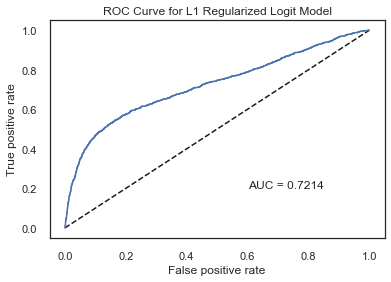

In [124]:
# Test final model 
pipeline.set_params(logit_model_l1__C=best_C)
pipeline.fit(X_train,y_train)
y_prob_logit_lasso = pipeline.predict_proba(X_test)
fpr_logit_lasso, tpr_logit_lasso, _ = roc_curve(y_test, y_prob_logit_lasso[:, 1])
best_auc_logit_lasso = roc_auc_score(y_test, y_prob_logit_lasso[:,1])
plot_roc(fpr_logit_lasso, tpr_logit_lasso, 'ROC Curve for L1 Regularized Logit Model', 'AUC = %2.4f' % best_auc_logit_lasso)

**PROBLEM**: Compare coefficients between a standard logit model and a regularized logit model, to see how Lasso drops predictors.

In [125]:
# Compare coefficients between a standard logit model and a regularized logit model, to see how Lasso drops predictors
logit_model = Pipeline([('s', StandardScaler()), ('m', LogisticRegression(penalty='l2', C = 1e10))]).fit(X_train_train, y_train_train).named_steps['m']
print('REGULARIZATION'.center(20), 'NONE'.center(10), 'L1'.center(10))
print('=' * 50)
for (varname, lm_coef, lml1_coef) in zip(features, logit_model.coef_[0], logit_model_l1.coef_[0]):
    lm_coeff  = "{0:.4f}".format(lm_coef).rjust(10)
    lml1_coef = "{0:.4f}".format(lml1_coef).rjust(10) if lml1_coef > 0.0001 else ""
    print(str(varname).center(20), lm_coeff, lml1_coef)

   REGULARIZATION       NONE        L1    
       PAY_3             0.0907     0.0815
       PAY_4             0.0001     0.0371
     BILL_AMT1          -0.4226 
      PAY_AMT2          -0.3393 
     MARRIAGE_1          0.0473     0.0318
       PAY_5             0.0410     0.0360
        AGE              0.0632     0.0511
     LIMIT_BAL          -0.0984 
     BILL_AMT6           0.0175 
     MARRIAGE_3          0.0034 
     MARRIAGE_0         -0.0667 
      PAY_AMT1          -0.3159 
     BILL_AMT2           0.2284     0.0366
      PAY_AMT6          -0.0187 
       PAY_2             0.1120     0.0967
     EDUCATION          -0.0615 
     MARRIAGE_2         -0.0415 
      PAY_AMT5          -0.0650 
       SEX_2            -0.0261 
     BILL_AMT5          -0.0026     0.0218
       SEX_1             0.0261     0.0084
      PAY_AMT4          -0.0350 
       PAY_6             0.0053 
     BILL_AMT4           0.0122     0.0026
      PAY_AMT3          -0.0408 
       PAY_1             0.6466 

**PROBLEM**: Comment on which predictors dropped, and why. HINT: Maybe plot a fast-and-rough correlation matrix to test a hunch if you have a hunch.

In [126]:
# Compute correlations  
correlations = {}
for column in data.columns:
    correlations[column] = data[column].corr(data['customer_default']) 
    
# Make sorted list by absolute value
corr_list = [ (abs(value), key) for key, value in correlations.items() ]
    
# Print correlations in rank order descending
for value, column in sorted(corr_list, reverse=True):
    print(str(column).ljust(30), "{0:.3f}".format(round(correlations[column],4)).rjust(6))

customer_default                1.000
PAY_1                           0.325
PAY_2                           0.264
PAY_3                           0.235
PAY_4                           0.217
PAY_5                           0.204
PAY_6                           0.187
LIMIT_BAL                      -0.153
PAY_AMT1                       -0.073
PAY_AMT2                       -0.059
PAY_AMT4                       -0.057
PAY_AMT3                       -0.056
PAY_AMT5                       -0.055
PAY_AMT6                       -0.053
SEX_2                          -0.040
SEX_1                           0.040
MARRIAGE_2                     -0.031
MARRIAGE_1                      0.030
EDUCATION                       0.028
BILL_AMT1                      -0.020
BILL_AMT2                      -0.014
BILL_AMT3                      -0.014
AGE                             0.014
MARRIAGE_0                     -0.013
BILL_AMT4                      -0.010
MARRIAGE_3                      0.010
BILL_AMT5   

ANSWER: PAY_1, PAY_2, PAY_3, PAY_4, PAY_5 and PAY_6 are the most highly correlated features to the target variable `customer_default`. It therefore is not surprising that the regularized Lasso model gave those predictors the most weight. Note, however, that Lasso quickly deflates the importance of each subsequent PAY variable -- most likely because those are highly correlated to each other, and thus duplicating the signal. Note also that many of the BILL_AMT features, the PAY_AMT features, and the MARRIAGE_ features are dropped out by lasso, again because they likely duplicate information.

# **PART 6**: PCA
As an interesting learning exercise, visualize ALL your data in 2 dimensions using PCA. PCA is only able to capture linear variations in the data. For non-linear projections, one could also use T-SNE. However, T-SNE has more tunable parameters compared to PCA.

**PROBLEM**: Use the sklearn StandardScaler() to standardize all of your features.

In [127]:
# Standardize ALL features
standard_scalar = StandardScaler()
features_std = standard_scalar.fit_transform(X)

**PROBLEM**: Use the sklearn PCA() function to project ALL features into just two dimensions.

In [128]:
# Project features into two dimensions
pca = PCA(n_components=2)
features_std_pca = pca.fit_transform(features_std)

**PROBLEM**: Explore the relationship between the AUC from a standard Logit Model (withOUT using Lasso) and the number of PCA Component Features being used as predictors in the model. In other words, build a `for` loop that tries many numbers of components from PCA in a basic Logit Model.  

Hint: you will need to use code like the following in order to build up a pipeline comprised of the StandardScaler(), PCA(), and LogisticRegression() steps.

    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('pca', PCA()))
    estimators.append(('model', LogisticRegression()))
    pipeline = Pipeline(estimators)
    

In [129]:
# Explore and print out results for the relationship between AUC and the number of PCA Component Features
x_results = []
y_results = []
for n in range(1, 11):
    estimators = []
    estimators.append(('standardize', StandardScaler()))
    estimators.append(('pca', PCA()))
    estimators.append(('model', LogisticRegression()))
    pipeline = Pipeline(estimators)
    pipeline.set_params(pca__n_components = n)
    pipeline.set_params(pca__random_state = SEED)

    # Performance of the tuned model on test set
    pipeline.fit(X_train, y_train)
    y_hat = pipeline.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_hat[:,1])
    print('{} component'.format(n).rjust(15), '  AUC = {0:.4f}'.format(auc))
    x_results.append(n)
    y_results.append(auc)

    1 component   AUC = 0.5722
    2 component   AUC = 0.6831
    3 component   AUC = 0.6867
    4 component   AUC = 0.6866
    5 component   AUC = 0.6948
    6 component   AUC = 0.6944
    7 component   AUC = 0.6965
    8 component   AUC = 0.6980
    9 component   AUC = 0.7003
   10 component   AUC = 0.7017


**PROBLEM**: Plot your incremental results (increasing levels of components) from the steps above.

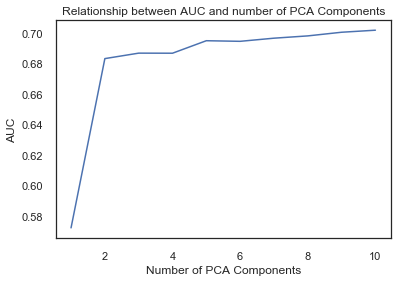

In [130]:
plt.figure(1)
plt.plot(x_results, y_results)
plt.xlabel('Number of PCA Components')
plt.ylabel('AUC')
plt.title('Relationship between AUC and number of PCA Components')
plt.show()

# **PART 7**:  K-Nearest Neighbors (KNN)

Again to help you get going, we will set up a basic pipeline for hyperparameter tuning K for you...

In [131]:
# Build pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('knn_model', KNeighborsClassifier()))
pipeline = Pipeline(estimators) 

**PROBLEM**: Tune the KNN model to find the optimal K.

In [132]:
# Tune K
results = []
for k in range(5, 100, 10):
    pipeline.set_params(knn_model__n_neighbors=k) 
    pipeline.fit(X_train_train,y_train_train)
    y_hat = pipeline.predict_proba(X_train_val)
    auc = roc_auc_score(y_train_val, y_hat[:,1])
    results.append( (auc, k) )
    
# View results 
print('K'.rjust(5), '   ', 'AUC'.center(8), '\n', '=' * 20)
for (auc, k) in results:
    print('{0}'.format(k).rjust(5), '   ',  '{0:.4f}'.format(auc).center(8))    

    K       AUC    
    5      0.6971 
   15      0.7371 
   25      0.7435 
   35      0.7460 
   45      0.7472 
   55      0.7484 
   65      0.7472 
   75      0.7462 
   85      0.7485 
   95      0.7476 


**PROBLEM**: What was the best K?

In [133]:
# Select best K
best_K = sorted(results)[-1][1]
auc = sorted(results)[-1][0]
print('Best value of K = %d, with AUC = %2.4f' % (best_K, auc))

Best value of K = 85, with AUC = 0.7485


**PROBLEM**: Test your final model and report the AUC.

In [134]:
# Test final model 
pipeline.set_params(knn_model__n_neighbors = best_K)
pipeline.fit(X_train, y_train)
y_hat_knn = pipeline.predict_proba(X_test)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_hat_knn[:, 1])
best_auc_knn = roc_auc_score(y_test, y_hat_knn[:,1])
print('KNN Model: Final test score for K = %d has AUC = %2.4f' % (best_K, best_auc_knn))

KNN Model: Final test score for K = 85 has AUC = 0.7538


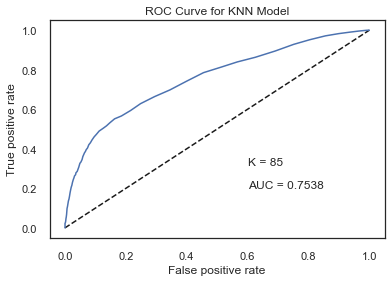

In [135]:
# Plot ROC
plot_roc(fpr_knn, tpr_knn, 'ROC Curve for KNN Model', 'K = %d \n\nAUC = %2.4f' % (best_K, best_auc_knn))

# **PART 8**: Decision Trees

Unlike a logit model or a KNN classifier, decision trees are not sensitive to the scaling of categorical features and numeric features. They can find a cut point in arbitrary numeric or categorical features. The implementation of decision trees in sklearn, however, does require categorical features to be one-hot-encoded, even though that is technically not required by the algorithm.

**PROBLEM**: Fit just one tree using the `DecisionTreeClassifier()` function from sklearn. There is no need to use a pipeline for this step, as it is just one tree.

In [136]:
# Fit a one-tree Model      
tree_model = DecisionTreeClassifier(random_state = SEED)  # just one tree, so no pipeline needed
tree_model.fit(X_train, y_train)
pass  # skip showing the model internals

**PROBLEM**: Test the model and report the AUC. HINT: Make sure you are using the test sets every time you do a final test!

In [137]:
# Test model
y_hat_tree = tree_model.predict_proba(X_test)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_hat_tree[:, 1])
auc_one_tree = roc_auc_score(y_test, y_hat_tree[:,1])
print('One Decision Tree Model: Final test score has AUC = {0:0.4f}'.format(auc_one_tree))

One Decision Tree Model: Final test score has AUC = 0.6153


**PROBLEM**: Plot the resulting ROC.

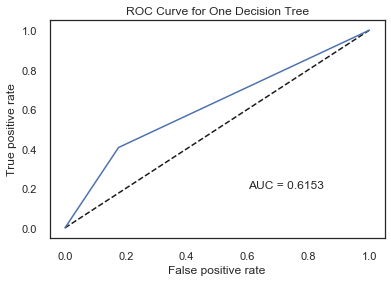

In [138]:
# Plot the ROC
plot_roc(fpr_tree, tpr_tree, 'ROC Curve for One Decision Tree', 'AUC = %2.4f' %  auc_one_tree)

**PROBLEM**: Use the `print_feature_importance()` function given to you above to print the relative feature importances of this model.

In [139]:
# Print feature importance
print_feature_importance(tree_model, features)

  Feature        Importance
   PAY_1          0.1604 
    AGE           0.0743 
 BILL_AMT1        0.0676 
  PAY_AMT3        0.0619 
 LIMIT_BAL        0.0580 
  PAY_AMT6        0.0528 
 BILL_AMT6        0.0513 
 BILL_AMT2        0.0504 
  PAY_AMT1        0.0483 
  PAY_AMT2        0.0455 
 BILL_AMT3        0.0426 
  PAY_AMT5        0.0425 
 BILL_AMT4        0.0417 
 BILL_AMT5        0.0406 
  PAY_AMT4        0.0352 
   PAY_2          0.0349 
 EDUCATION        0.0208 
   PAY_5          0.0104 
   PAY_6          0.0104 
   PAY_4          0.0102 
   PAY_3          0.0099 
   SEX_2          0.0073 
 MARRIAGE_1       0.0072 
   SEX_1          0.0069 
 MARRIAGE_2       0.0064 
 MARRIAGE_3       0.0017 
 MARRIAGE_0       0.0008 


# **PART 8**: Random Forests

Just one tree may be an arbitrary and unreliable model. So next, use the `RandomForestClassifier()` model from sklearn to run a random forest of trees and average across them.

**PROBLEM**: Build a pipeline for a random forest.

In [140]:
# Build pipeline
estimators = []
estimators.append(('forest_model', RandomForestClassifier()))
pipeline = Pipeline(estimators)
pipeline.set_params(forest_model__random_state=SEED)

Pipeline(memory=None,
     steps=[('forest_model', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False))])

**PROBLEM**: Tune for N, the number of trees and print out the results so you can find the best N.

In [141]:
# Tune N   
results = []
for n in [10, 50, 150, 200, 250]:
    pipeline.set_params(forest_model__n_estimators = n) 
    pipeline.fit(X_train_train, y_train_train)
    y_train_pred = pipeline.predict_proba(X_train_val)
    auc = roc_auc_score(y_train_val, y_train_pred[:,1])
    results.append( (auc, n))

# View results 
print('N'.rjust(5), '   ', 'AUC'.center(8), '\n', '=' * 20)
for (auc, n) in results:
    print('{0}'.format(n).rjust(5), '   ',  '{0:.4f}'.format(auc).center(8))   

    N       AUC    
   10      0.7279 
   50      0.7589 
  150      0.7685 
  200      0.7687 
  250      0.7699 


**PROBLEM**: Test the model and report the AUC. HINT: Make sure you are using the test sets every time you do a final test!

In [142]:
# Test final model
best_N = 150   # AUC will generally improve with more interations, but eventually level off
pipeline.set_params(forest_model__n_estimators=best_N)
pipeline.fit(X_train, y_train)
y_hat_forest = pipeline.predict_proba(X_test)
fpr_forest, tpr_forest, _ = roc_curve(y_test, y_hat_forest[:, 1])
best_auc_forest = roc_auc_score(y_test, y_hat_forest[:,1])
print('Random Forest Model: Final test score for N = %d has AUC = %2.4f' % (best_N, best_auc_forest))

Random Forest Model: Final test score for N = 150 has AUC = 0.7637


**PROBLEM**: Plot the resulting ROC.

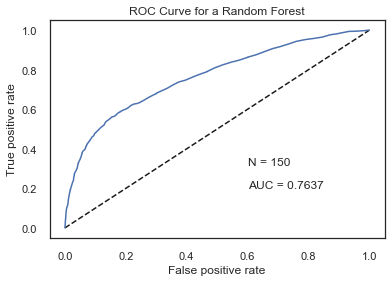

In [143]:
# Plot the ROC
plot_roc(fpr_forest, tpr_forest, 'ROC Curve for a Random Forest', 'N = %d \n\nAUC = %2.4f' %  (best_N, best_auc_forest))

**PROBLEM**: Use the `print_feature_importance()` function given to you above to print the relative feature importances of this model.

In [144]:
# Print feature importance
forest_model = pipeline.named_steps['forest_model']
print_feature_importance(forest_model, features)

  Feature        Importance
   PAY_1          0.0962 
    AGE           0.0664 
 BILL_AMT1        0.0604 
 LIMIT_BAL        0.0593 
 BILL_AMT2        0.0538 
 BILL_AMT3        0.0507 
  PAY_AMT1        0.0506 
 BILL_AMT6        0.0497 
 BILL_AMT4        0.0489 
 BILL_AMT5        0.0485 
  PAY_AMT2        0.0476 
  PAY_AMT3        0.0455 
  PAY_AMT6        0.0452 
   PAY_2          0.0452 
  PAY_AMT4        0.0429 
  PAY_AMT5        0.0428 
   PAY_3          0.0259 
   PAY_5          0.0233 
   PAY_4          0.0224 
 EDUCATION        0.0198 
   PAY_6          0.0187 
   SEX_2          0.0087 
 MARRIAGE_1       0.0086 
 MARRIAGE_2       0.0085 
   SEX_1          0.0084 
 MARRIAGE_3       0.0017 
 MARRIAGE_0       0.0003 
